In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Processed_data/Thyroid_Diff.csv')

In [3]:
# Calaculate the correlation matrix
corr_matrix = df.corr()

In [4]:
features = corr_matrix['Recurred'].sort_values(ascending=False)
selected_features = features[(features > 0.3) | (features < -0.3)]
selected_features_names = selected_features.index

df = df[selected_features_names]

X = df.drop('Recurred',axis=1)
y = df['Recurred']

## Split the data into training and testing sets

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

In [7]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# model = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                            cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

# print(f'Best Parameters: {best_params}')

# best_model = grid_search.best_estimator_

In [8]:
# Best parameters resulted from Grid search
model = RandomForestClassifier(bootstrap= False, max_depth= None, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split = 5, n_estimators= 100)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5)

In [9]:
# Make predictions on training data
y_train_pred = model.predict(X_train)

# Make predictions on test data
y_test_pred = model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Training Accuracy: {train_accuracy}')
print(f'Training Sensitivity (Recall): {train_recall}')
print(f'Training AUC: {train_auc}')

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Sensitivity (Recall): {test_recall}')
print(f'Test AUC: {test_auc}')

# Print confusion matrix and classification report for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Training Accuracy: 0.979381443298969
Training Sensitivity (Recall): 0.9418604651162791
Training AUC: 0.9979580260918888
Test Accuracy: 0.958904109589041
Test Sensitivity (Recall): 0.9090909090909091
Test AUC: 0.9901960784313726
Confusion Matrix:
[[50  1]
 [ 2 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73



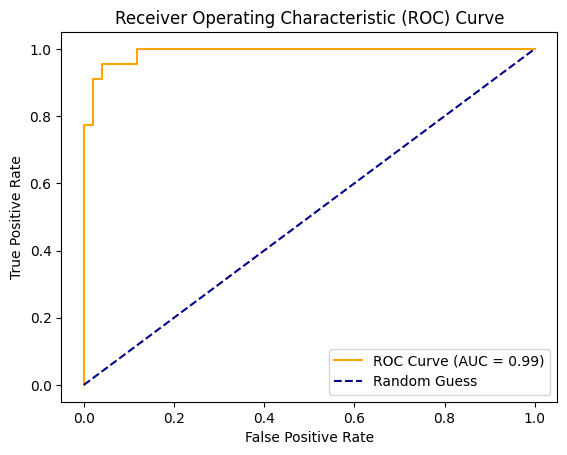

In [10]:
# plot the AUC-ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

In [11]:
import pickle

# Save the trained model to a pickle file
with open('saved_models/random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [12]:
# Load the model from the pickle file
with open('saved_models/random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Verify that the loaded model works by making a prediction
loaded_model_predictions = loaded_model.predict(X_test)

# Evaluate the loaded model on the test data
loaded_model_accuracy = accuracy_score(y_test, loaded_model_predictions)
loaded_model_recall = recall_score(y_test, loaded_model_predictions)
loaded_model_auc = roc_auc_score(y_test, loaded_model.predict_proba(X_test)[:, 1])

print(f'Loaded Model Test Accuracy: {loaded_model_accuracy}')
print(f'Loaded Model Test Sensitivity (Recall): {loaded_model_recall}')
print(f'Loaded Model Test AUC: {loaded_model_auc}')


Loaded Model Test Accuracy: 0.958904109589041
Loaded Model Test Sensitivity (Recall): 0.9090909090909091
Loaded Model Test AUC: 0.9901960784313726
